In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense , LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv('/content/AirPassengers.csv')
data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.tail(10)

,Month,#Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
len(data)

144

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data=data['#Passengers']
data.head()

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

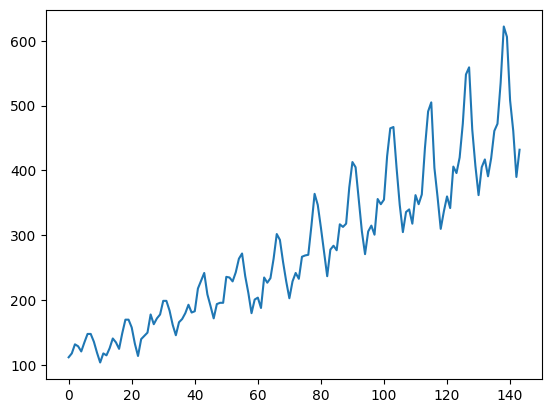

In [ ]:
data=np.array(data).reshape(-1,1)
plt.plot(data)
plt.show()

In [ ]:
sc=MinMaxScaler()
data=sc.fit_transform(data)


In [ ]:
len(data)

144

In [ ]:
data[0]

array([0.01544402])

In [ ]:
train=data[0:100:]
test=data[100:,:]

In [ ]:
def veri(data,steps):
  datax=[]
  datay=[]
  for i in range(len(data)-steps-1):
    a=data[i:(i+steps),0]
    datax.append(a)
    datay.append(data[i+steps,0])
  return np.array(datax),np.array(datay)


In [ ]:
steps=3

In [ ]:
xtrain,ytrain=veri(train,steps)
xtest,ytest=veri(test,steps)

In [ ]:
# Eğitim verilerini özellik boyutunu içerecek şekilde yeniden şekillendirin
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

# Test verilerini özellik boyutunu içerecek şekilde yeniden şekillendirin
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(xtrain.shape[1], 1)))  # Burada doğru girdi şeklini kullanın
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,881 (292.50 KB)

 Trainable params: 74,881 (292.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit( xtrain, ytrain, epochs=40 , batch_size=1)

Epoch 1/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0140
Epoch 2/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048
Epoch 3/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048
Epoch 4/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050
Epoch 5/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048
Epoch 6/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035
Epoch 7/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036
Epoch 8/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 9/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0025
Epoch 10/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022
Epoch 11/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025
Epoch 12/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
Epoch 13/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027
Epoch 14/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
Epoch 15/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030
Epoch 16/40
96/96 ━

In [ ]:
ypred=model.predict(xtest)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [ ]:
ypred=sc.inverse_transform(ypred)
ytest=ytest.reshape(-1,1)
ytest=sc.inverse_transform(ytest)

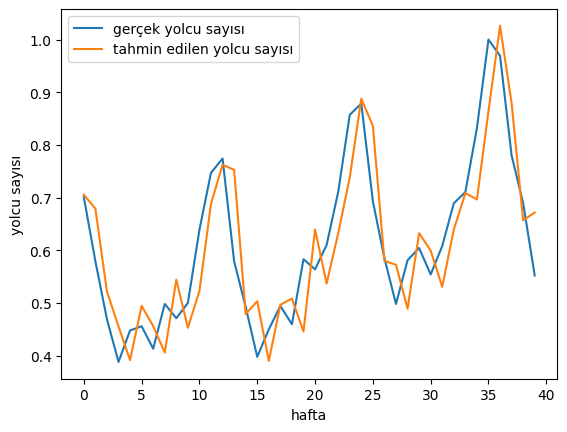

In [ ]:
plt.plot(ytest, label='gerçek yolcu sayısı')
plt.plot(ypred, label='tahmin edilen yolcu sayısı')
plt.xlabel('hafta')
plt.ylabel('yolcu sayısı')
plt.legend()
plt.show()